这个文档用来分析study'TIMs_Hetero_tempsweep_Task_Pareto'上获得帕累托的点的TIMs，以及任务表现（目前仅有NARMA-10）

预期：1. 画出帕累托前沿点；见文件夹；2.查看帕累托前沿上的点的TIMs

### 库

In [1]:
import sys
import os
import glob
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from Plotting import plot_style_config
from Plotting import ParetoFront_Plotting
from Analysis.analysis_TIMs_with_temperatures import analysis_TIMs_with_temperatures
from Analysis.assisted_functions import load_data
from Analysis.assisted_functions import analyze_correlations
from Analysis.assisted_plotting import plot_scatter


### 看看MOO_21中的TIMs特征与任务表现的相关性

In [18]:
folder_loc = "../MOO_21" # 相对路径
pattern = "result_MC_heterogeneous"
cols_needed = ['temp', 'MC'] # 假设你需要这两列，根据实际情况修改

# 调用函数
df_all = load_data(folder_loc, pattern, cols_needed)

# 检查数据
print(df_all)

找到 7 个文件，开始处理...
     temp        MC  number
0    19.1  4.276751       1
1    19.2  4.272924       1
2    19.3  4.293496       1
3    19.4  4.325227       1
4    19.5  4.335268       1
..    ...       ...     ...
128  20.5  5.147096       7
129  20.6  5.120303       7
130  20.7  5.072875       7
131  20.8  5.081350       7
132  20.9  4.948905       7

[133 rows x 3 columns]


In [19]:
# 单独提取number为10的储层数据，注意重新排序
subset = df_all[df_all['number'] == 7].sort_values('temp')
print(subset)

# 对mc_array进行TIMs特征分析
analysis_results = analysis_TIMs_with_temperatures(subset['MC'])
print(analysis_results)

     temp        MC  number
114  19.1  5.166347       7
115  19.2  5.189926       7
116  19.3  5.204553       7
117  19.4  5.187663       7
118  19.5  5.179491       7
119  19.6  5.200556       7
120  19.7  5.185380       7
121  19.8  5.156213       7
122  19.9  5.149350       7
123  20.0  5.136119       7
124  20.1  5.155870       7
125  20.2  5.129835       7
126  20.3  5.128787       7
127  20.4  5.127405       7
128  20.5  5.147096       7
129  20.6  5.120303       7
130  20.7  5.072875       7
131  20.8  5.081350       7
132  20.9  4.948905       7
{'mean': np.float64(5.140422376326907), 'median': np.float64(5.149349974369188), 'std': np.float64(0.05749789176449313), 'var': np.float64(0.0033060075573613673), 'amplitude': np.float64(0.2556474969891971), 'first_order_sensitivity': np.float64(-0.008459797908919387), 'second_order_sensitivity': np.float64(-0.000808925005015837)}


In [20]:
import numpy as np
#遍历所有number的储层，进行TIMs特征分析
labels = df_all['number'].unique()
# 创建一个字典来存储每个number的分析结果
analysis_results_dict = {}
for label in labels:
    subset = df_all[df_all['number'] == label].sort_values('temp')
    analysis_results = analysis_TIMs_with_temperatures(subset['MC'])
    analysis_results_dict[label] = analysis_results

# 将分析结果转换为DataFrame
analysis_results_df = pd.DataFrame(analysis_results_dict)

# 提取每个储层的averagenrmse数据
filename = '../MOO_21/NARMA10_nrmse.csv'

averagenrmse = pd.read_csv(filename)
print(averagenrmse)

# 创建一个字典，number -> averagenrmse值
averagenrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['averagenrmse']))

# 创建一行数据，索引对齐到analysis_results_df的列
averagenrmse_row = pd.Series({
    num: averagenrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='averagenrmse')

# 添加到analysis_results_df
analysis_results_df.loc['averagenrmse'] = averagenrmse_row

# 打印分析结果
print(analysis_results_df)

   number  minnrmse  averagenrmse
0       1  0.557040      1.265406
1       2  0.578612      1.097466
2       3  0.586102      0.918788
3       4  0.599290      0.854161
4       5  0.617384      0.835658
5       6  0.618122      0.831782
6       7  0.631791      0.720975
                                 1         2         3         4         5  \
mean                      4.432814  4.407986  4.210555  5.180195  3.978253   
median                    4.430086  4.518063  4.230137  5.169942  3.941744   
std                       0.111805  0.246969  0.133630  0.129535  0.142115   
var                       0.012500  0.060993  0.017857  0.016779  0.020197   
amplitude                 0.354674  0.790038  0.480752  0.405825  0.499522   
first_order_sensitivity   0.020190 -0.037868  0.010507  0.023399 -0.007453   
second_order_sensitivity  0.000427 -0.004428  0.003554  0.000437  0.004622   
averagenrmse              1.265406  1.097466  0.918788  0.854161  0.835658   

                         

特征与 averagenrmse 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
mean                       0.0176       0.9702    0.1429       0.7599
median                     0.0527       0.9107    0.1071       0.8192
std                       -0.0125       0.9788    0.0000       1.0000
var                       -0.1114       0.8120    0.0000       1.0000
amplitude                 -0.1028       0.8263    0.0000       1.0000
first_order_sensitivity   -0.1077       0.8181   -0.0714       0.8790
second_order_sensitivity  -0.3837       0.3954   -0.3571       0.4316
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



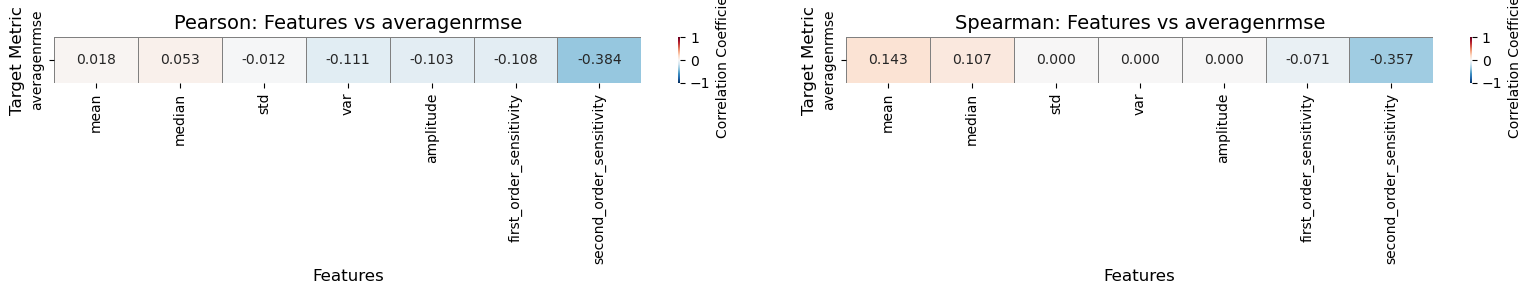

In [21]:
tims_features = ['mean', 'median', 'std', 'var', 'amplitude', 
                 'first_order_sensitivity', 'second_order_sensitivity']
analyze_correlations(analysis_results_df,tims_features,target_metric='averagenrmse',plot=True)

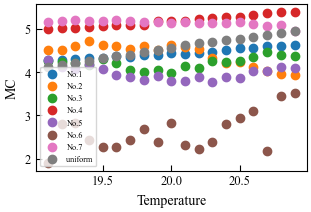

In [26]:
# 开始画图
plot_style_config.set_pub_style()

# 获取所有唯一的标签
labels = df_all['number'].unique()

plt.figure(figsize=plot_style_config.get_figsize('single'))

filename1 = '../result_MC_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_uniform = pd.read_csv(filename1)


# 循环遍历每一个标签，单独画一条线
for label in labels:
    # 筛选出当前标签的数据
    subset = df_all[df_all['number'] == label]
    plt.scatter(
        subset['temp'],
        subset['MC'],
        label=f'No.{label}',  # 这里使用标签作为图例
        marker='o',
        linewidth=1
    )

plt.scatter(
    df_uniform['temp'],
    df_uniform['MC'],
    label='uniform',
    marker='o',
    linewidth=1
)

plt.xlabel('Temperature')
plt.ylabel('MC')
plt.legend()  # 显示所有 legend
plt.show()




### 看看TIMs_hetero中的TIMs分析

In [22]:
# 设定参数
folder_loc = "../paretofront_points_TIMs_NARMA10" # 相对路径
pattern = "result_MC_heterogeneous"
cols_needed = ['temp', 'MC'] # 假设你需要这两列，根据实际情况修改

# 调用函数
df_all = load_data(folder_loc, pattern, cols_needed)

# 检查数据
print(df_all)


找到 11 个文件，开始处理...
    temp        MC  number
48  20.1  4.937483       1
49  20.2  4.974730       1
50  20.3  4.954238       1
51  20.4  4.964111       1
52  20.5  5.013663       1
..   ...       ...     ...
37  20.9  4.401169      11
19  19.1  4.484759      11
21  19.3  4.330039      11
20  19.2  4.407928      11
32  20.4  4.317073      11

[209 rows x 3 columns]


In [23]:
# 单独提取number为10的储层数据，注意重新排序
subset = df_all[df_all['number'] == 1].sort_values('temp')

# 对mc_array进行TIMs特征分析
analysis_results = analysis_TIMs_with_temperatures(subset['MC'])
print(analysis_results)

{'mean': np.float64(4.872863029702615), 'median': np.float64(4.898506556247215), 'std': np.float64(0.16848594479206794), 'var': np.float64(0.02838751359247577), 'amplitude': np.float64(0.5733058930605042), 'first_order_sensitivity': np.float64(0.02978314007909117), 'second_order_sensitivity': np.float64(0.00020843973892237244)}


In [24]:
import numpy as np
#遍历所有number的储层，进行TIMs特征分析
labels = df_all['number'].unique()
# 创建一个字典来存储每个number的分析结果
analysis_results_dict = {}
for label in labels:
    subset = df_all[df_all['number'] == label].sort_values('temp')
    analysis_results = analysis_TIMs_with_temperatures(subset['MC'])
    analysis_results_dict[label] = analysis_results

# 将分析结果转换为DataFrame
analysis_results_df = pd.DataFrame(analysis_results_dict)
print(analysis_results_df)

# 提取每个储层的averagenrmse数据
filename = '../paretofront_points_TIMs_NARMA10/NARMA10_nrmse_1.csv'

averagenrmse = pd.read_csv(filename)

# 创建一个字典，number -> averagenrmse值
averagenrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['averagenrmse']))

# 创建一行数据，索引对齐到analysis_results_df的列
averagenrmse_row = pd.Series({
    num: averagenrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='averagenrmse')

# 添加到analysis_results_df
analysis_results_df.loc['averagenrmse'] = averagenrmse_row





                                1         2         3         4         5   \
mean                      4.872863  5.444717  5.090418  5.267760  4.739217   
median                    4.898507  5.510507  5.075236  5.280618  4.731808   
std                       0.168486  0.123144  0.259650  0.150672  0.177069   
var                       0.028388  0.015165  0.067418  0.022702  0.031353   
amplitude                 0.573306  0.339245  0.791271  0.484049  0.645113   
first_order_sensitivity   0.029783  0.020715  0.046779  0.026905  0.031778   
second_order_sensitivity  0.000208 -0.001380 -0.000286  0.000434  0.000463   

                                6         7         8         9         10  \
mean                      5.020009  5.265206  4.627748  5.370661  4.612884   
median                    5.141311  5.269198  4.645351  5.368167  4.625209   
std                       0.357199  0.159313  0.384395  0.077424  0.158282   
var                       0.127591  0.025381  0.147760  0.00599

特征与 averagenrmse 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
mean                       0.3869       0.2398    0.5000       0.1173
median                     0.3857       0.2414    0.4727       0.1420
std                       -0.0718       0.8337    0.1818       0.5926
var                       -0.1378       0.6862    0.1818       0.5926
amplitude                 -0.1232       0.7181    0.1364       0.6893
first_order_sensitivity    0.2180       0.5195    0.3545       0.2847
second_order_sensitivity  -0.0733       0.8304   -0.4091       0.2115
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



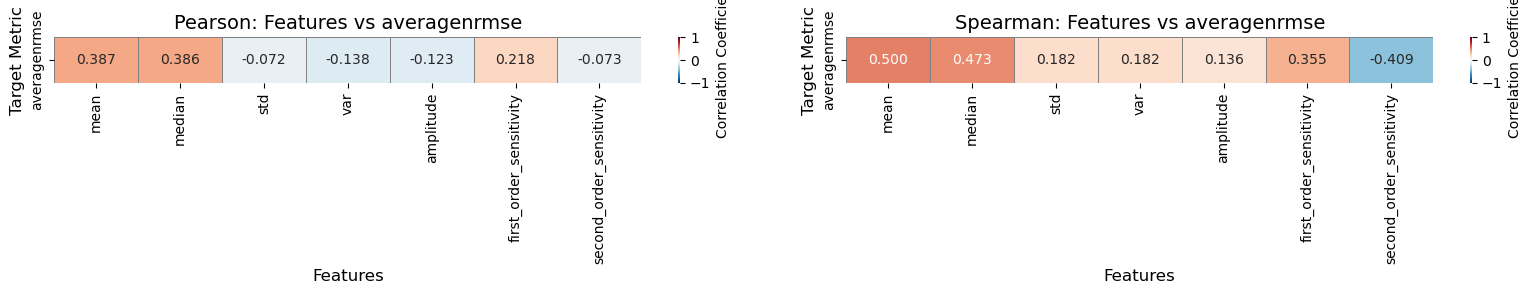

In [25]:
tims_features = ['mean', 'median', 'std', 'var', 'amplitude', 
                 'first_order_sensitivity', 'second_order_sensitivity']
analyze_correlations(analysis_results_df,tims_features,target_metric='averagenrmse',plot=True)

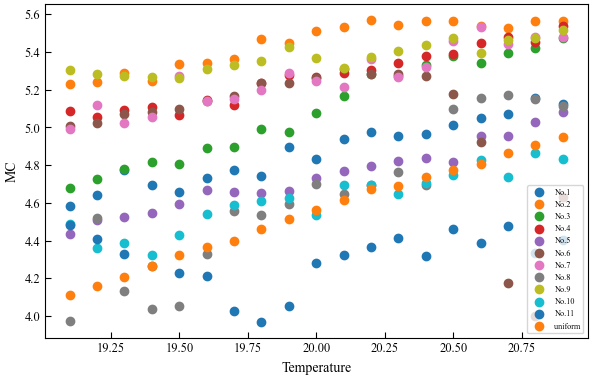

In [34]:
# 开始画图
plot_style_config.set_pub_style()

# 获取所有唯一的标签
labels = df_all['number'].unique()

plt.figure(figsize=plot_style_config.get_figsize('double'))

filename1 = '../result_MC_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_uniform = pd.read_csv(filename1)


# 循环遍历每一个标签，单独画一条线
for label in labels:
    # 筛选出当前标签的数据
    subset = df_all[df_all['number'] == label]
    plt.scatter(
        subset['temp'],
        subset['MC'],
        label=f'No.{label}',  # 这里使用标签作为图例
        marker='o',
        linewidth=1
    )

plt.scatter(
    df_uniform['temp'],
    df_uniform['MC'],
    label='uniform',
    marker='o',
    linewidth=1
)

plt.xlabel('Temperature')
plt.ylabel('MC')
plt.legend()  # 显示所有 legend
plt.show()

### 看看TIMs_hetero_random中的TIMs分析

In [35]:
# 设定参数
folder_loc = "../random_points_TIMs_hetero" # 相对路径
pattern = "result_MC_heterogeneous"
cols_needed = ['temp', 'MC'] # 假设你需要这两列，根据实际情况修改

# 调用函数
df_all = load_data(folder_loc, pattern, cols_needed)

# 检查数据
print(df_all)

找到 50 个文件，开始处理...
     temp        MC  number
832  20.6  3.041315       5
831  20.5  3.006545       5
825  19.9  2.930773       5
824  19.8  2.966966       5
827  20.1  2.937803       5
..    ...       ...     ...
761  19.2  4.407928     311
760  19.1  4.484759     311
778  20.9  4.401169     311
776  20.7  4.477723     311
773  20.4  4.317073     311

[950 rows x 3 columns]


In [36]:

#遍历所有number的储层，进行TIMs特征分析
labels = df_all['number'].unique()
# 创建一个字典来存储每个number的分析结果
analysis_results_dict = {}
for label in labels:
    subset = df_all[df_all['number'] == label].sort_values('temp')
    analysis_results = analysis_TIMs_with_temperatures(subset['MC'])
    analysis_results_dict[label] = analysis_results

# 将分析结果转换为DataFrame
analysis_results_df = pd.DataFrame(analysis_results_dict)


# 提取每个储层的averagenrmse数据
filename = '../random_points_TIMs_hetero/NARMA10_nrmse.csv'

averagenrmse = pd.read_csv(filename)

# 创建一个字典，number -> averagenrmse值
averagenrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['averagenrmse']))

# 创建一行数据，索引对齐到analysis_results_df的列
averagenrmse_row = pd.Series({
    num: averagenrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='averagenrmse')

# 添加到analysis_results_df
analysis_results_df.loc['averagenrmse'] = averagenrmse_row

print(analysis_results_df)

                               5         7         9         17        33   \
mean                      3.073722  3.466354  4.872863  0.794379  1.770831   
median                    3.041315  3.488738  4.898507  0.921463  1.760216   
std                       0.125594  0.065270  0.168486  0.304021  0.385182   
var                       0.015774  0.004260  0.028388  0.092428  0.148365   
amplitude                 0.420320  0.257774  0.573306  0.960570  1.473009   
first_order_sensitivity  -0.011408  0.009370  0.029783  0.033945 -0.068164   
second_order_sensitivity  0.003954 -0.000616  0.000208 -0.006594  0.001081   
averagenrmse              1.406739  0.932877  0.996049  1.035557  0.979777   

                               46        73        76        90        93   \
mean                      0.429890  0.894854  3.738048  3.962433  3.801547   
median                    0.462682  0.901978  4.041269  3.952000  3.813405   
std                       0.129651  0.056084  0.735462  0.07220

特征与 averagenrmse 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
mean                       0.1794       0.2126   -0.1291       0.3715
median                     0.1817       0.2068   -0.1171       0.4182
std                        0.0161       0.9116    0.2023       0.1589
var                        0.0475       0.7434    0.2023       0.1589
amplitude                  0.0706       0.6259    0.2475       0.0831
first_order_sensitivity    0.0356       0.8063    0.0473       0.7444
second_order_sensitivity  -0.0083       0.9542    0.0141       0.9226
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



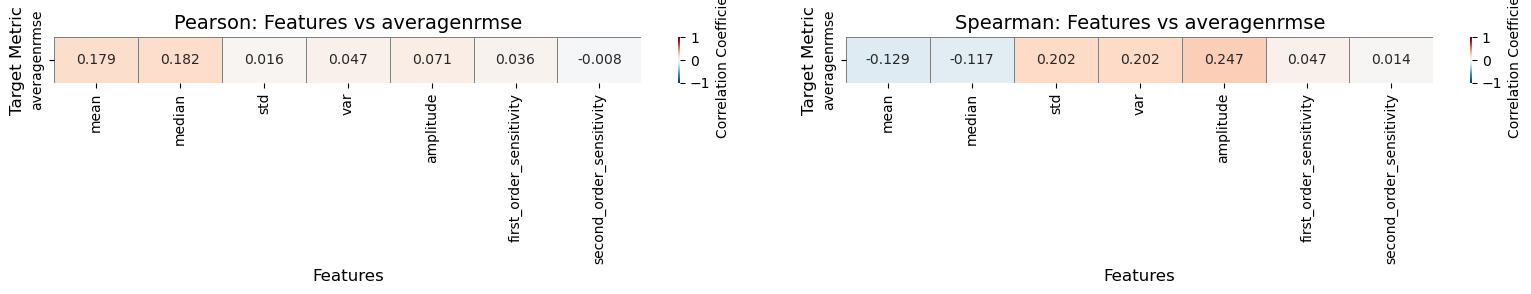

In [37]:
tims_features = ['mean', 'median', 'std', 'var', 'amplitude', 
                 'first_order_sensitivity', 'second_order_sensitivity']
analyze_correlations(analysis_results_df,tims_features,target_metric='averagenrmse',plot=True)

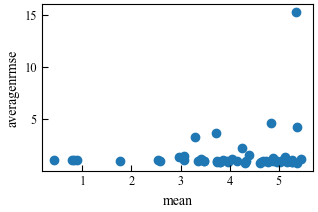

In [39]:
# 我想要将所有mean提取出来
std_values = analysis_results_df.loc['mean']
averagenrmse_values = analysis_results_df.loc['averagenrmse']

# 画出mean与averagenrmse的散点图
plot_scatter(std_values, averagenrmse_values, 'mean', 'averagenrmse')

### 看看TIMs_hetero_random中TIMs分析与minnrmse的关系

In [40]:
# 设定参数
folder_loc = "../random_points_TIMs_hetero" # 相对路径
pattern = "result_MC_heterogeneous"
cols_needed = ['temp', 'MC'] # 假设你需要这两列，根据实际情况修改

# 调用函数
df_all = load_data(folder_loc, pattern, cols_needed)

# 检查数据
print(df_all)

找到 50 个文件，开始处理...
     temp        MC  number
832  20.6  3.041315       5
831  20.5  3.006545       5
825  19.9  2.930773       5
824  19.8  2.966966       5
827  20.1  2.937803       5
..    ...       ...     ...
761  19.2  4.407928     311
760  19.1  4.484759     311
778  20.9  4.401169     311
776  20.7  4.477723     311
773  20.4  4.317073     311

[950 rows x 3 columns]


In [41]:
#遍历所有number的储层，进行TIMs特征分析
labels = df_all['number'].unique()
# 创建一个字典来存储每个number的分析结果
analysis_results_dict = {}
for label in labels:
    subset = df_all[df_all['number'] == label].sort_values('temp')
    analysis_results = analysis_TIMs_with_temperatures(subset['MC'])
    analysis_results_dict[label] = analysis_results

# 将分析结果转换为DataFrame
analysis_results_df = pd.DataFrame(analysis_results_dict)


# 提取每个储层的averagenrmse数据
filename = '../random_points_TIMs_hetero/NARMA10_nrmse.csv'

averagenrmse = pd.read_csv(filename)

# 创建一个字典，number -> averagenrmse值
averagenrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['averagenrmse']))
minnrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['minnrmse']))

# 创建一行数据，索引对齐到analysis_results_df的列
averagenrmse_row = pd.Series({
    num: averagenrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='averagenrmse')
minnrmse_row = pd.Series({
    num: minnrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='minnrmse')

# 添加到analysis_results_df
analysis_results_df.loc['averagenrmse'] = averagenrmse_row
analysis_results_df.loc['minnrmse'] = minnrmse_row

print(analysis_results_df)

                               5         7         9         17        33   \
mean                      3.073722  3.466354  4.872863  0.794379  1.770831   
median                    3.041315  3.488738  4.898507  0.921463  1.760216   
std                       0.125594  0.065270  0.168486  0.304021  0.385182   
var                       0.015774  0.004260  0.028388  0.092428  0.148365   
amplitude                 0.420320  0.257774  0.573306  0.960570  1.473009   
first_order_sensitivity  -0.011408  0.009370  0.029783  0.033945 -0.068164   
second_order_sensitivity  0.003954 -0.000616  0.000208 -0.006594  0.001081   
averagenrmse              1.406739  0.932877  0.996049  1.035557  0.979777   
minnrmse                  0.862385  0.844214  0.579324  1.014981  0.958001   

                               46        73        76        90        93   \
mean                      0.429890  0.894854  3.738048  3.962433  3.801547   
median                    0.462682  0.901978  4.041269  3.95200

特征与 minnrmse 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
mean                      -0.7784 ***   0.0000   -0.7934 ***   0.0000
median                    -0.7755 ***   0.0000   -0.7769 ***   0.0000
std                        0.2333       0.1030    0.0406       0.7798
var                        0.3076 *     0.0298    0.0406       0.7798
amplitude                  0.2291       0.1095    0.0714       0.6220
first_order_sensitivity   -0.6322 ***   0.0000   -0.6765 ***   0.0000
second_order_sensitivity  -0.0066       0.9639   -0.0617       0.6704
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



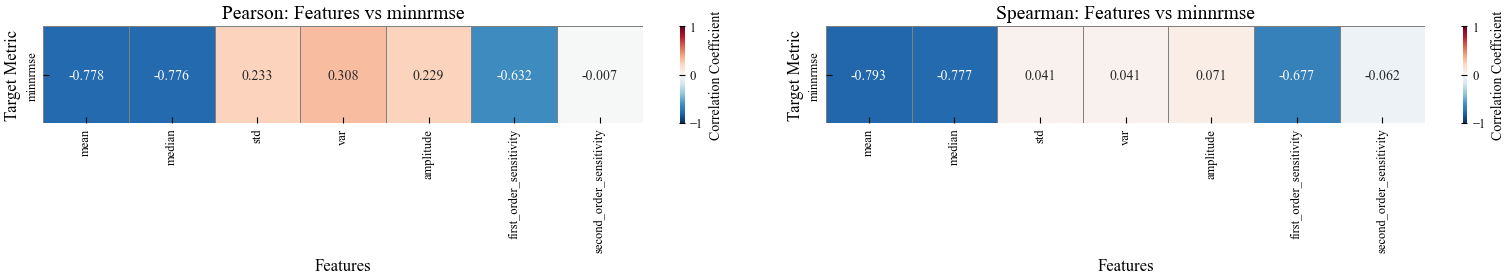

In [42]:
tims_features = ['mean', 'median', 'std', 'var', 'amplitude', 
                 'first_order_sensitivity', 'second_order_sensitivity']
analyze_correlations(analysis_results_df,tims_features,target_metric='minnrmse',plot=True)

### 看看TIMs_hetero中的TIMs分析：储层的MC(T)和CQ(T)的协同性

In [49]:
# 设定参数
folder_loc = "../paretofront_points_TIMs_NARMA10" # 相对路径
pattern = "result_MC_heterogeneous"
cols_needed = ['temp', 'MC'] # 假设你需要这两列，根据实际情况修改

# 调用函数
MCT = load_data(folder_loc, pattern, cols_needed)

# 设定参数
folder_loc = "../paretofront_points_TIMs_NARMA10" # 相对路径
pattern = "result_KRandGR_heterogeneous"
cols_needed = ['temp', 'CQ'] # 假设你需要这两列，根据实际情况修改

# 调用函数
CQT = load_data(folder_loc, pattern, cols_needed)


找到 11 个文件，开始处理...
找到 11 个文件，开始处理...


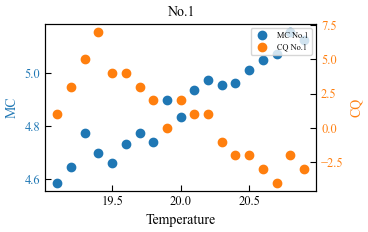

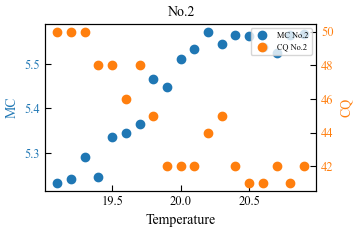

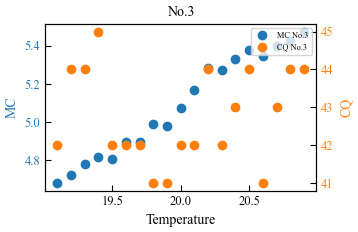

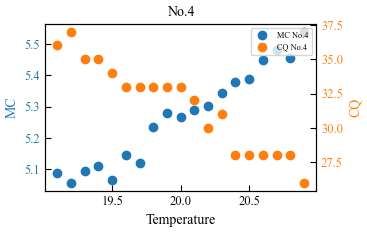

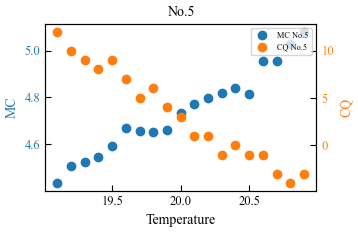

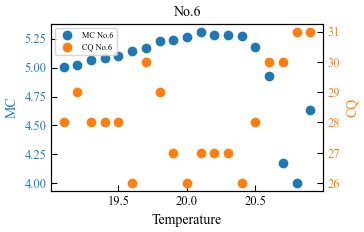

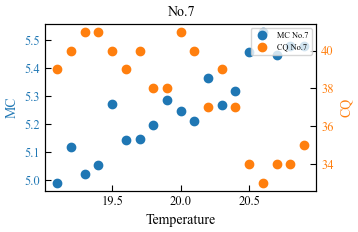

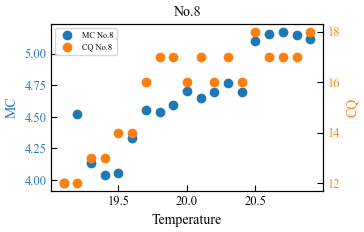

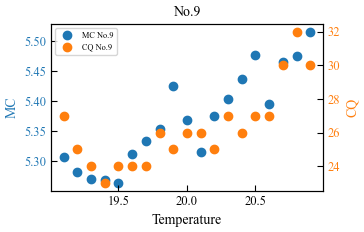

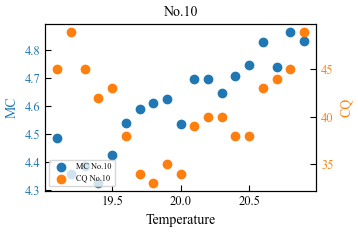

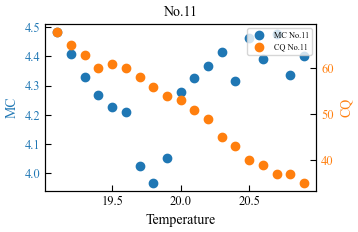

In [50]:
# 开始画图
plot_style_config.set_pub_style()
 # 修正了括号

# 获取所有唯一的标签
labels_MCT = MCT['number'].unique()


# 循环遍历每一个标签，单独画一条线（双y轴版本）
for label in labels_MCT:
    fig, ax1 = plt.subplots(figsize=plot_style_config.get_figsize('single'))
    # 筛选出当前标签的数据
    subset_MCT = MCT[MCT['number'] == label]
    subset_CQT = CQT[CQT['number'] == label]
    
    color_mc = 'tab:blue'
    color_cq = 'tab:orange'
    
    ax1.set_xlabel('Temperature')
    ax1.set_ylabel('MC', color=color_mc)
    ax1.scatter(
        subset_MCT['temp'],
        subset_MCT['MC'],
        label=f'MC No.{label}',
        marker='o',
        color=color_mc,
        linewidth=1
    )
    ax1.tick_params(axis='y', labelcolor=color_mc)

    # 创建第二个y轴
    ax2 = ax1.twinx()
    ax2.set_ylabel('CQ', color=color_cq)
    ax2.scatter(
        subset_CQT['temp'],
        subset_CQT['CQ'],
        label=f'CQ No.{label}',
        marker='o',
        color=color_cq,
        linewidth=1
    )
    ax2.tick_params(axis='y', labelcolor=color_cq)

    # 合并图例
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(handles1 + handles2, labels1 + labels2, loc='best')

    plt.title(f'No.{label}')
    plt.show()


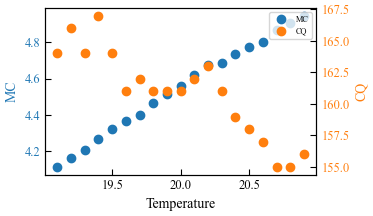

In [51]:
# uniform的MC与CQ
filename1 = '../result_MC_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_mc = pd.read_csv(filename1)
filename2 = '../result_KRandGR_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_cq = pd.read_csv(filename2)
fig, ax1 = plt.subplots(figsize=plot_style_config.get_figsize('single'))

color_mc = 'tab:blue'
color_cq = 'tab:orange'

ax1.set_xlabel('Temperature')
ax1.set_ylabel('MC', color=color_mc)
ax1.scatter(
    df_mc['temp'],
    df_mc['MC'],
    label=f'MC',
    marker='o',
    color=color_mc,
    linewidth=1
)
ax1.tick_params(axis='y', labelcolor=color_mc)

# 创建第二个y轴
ax2 = ax1.twinx()
ax2.set_ylabel('CQ', color=color_cq)
ax2.scatter(
    df_cq['temp'],
    df_cq['CQ'],
    label=f'CQ',
    marker='o',
    color=color_cq,
    linewidth=1
)
ax2.tick_params(axis='y', labelcolor=color_cq)

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='best')

plt.show()





### 计算下uniform的TIMs特征


In [35]:
filename1 = '../result_MC_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_uniform = pd.read_csv(filename1)

# 对mc_array进行TIMs特征分析
analysis_results = analysis_TIMs_with_temperatures(df_uniform['MC'])
print(analysis_results)


{'mean': np.float64(4.5467719966200875), 'median': np.float64(4.5610417113540205), 'std': np.float64(0.25491974702332204), 'var': np.float64(0.06498407742243452), 'amplitude': np.float64(0.8364891348104386), 'first_order_sensitivity': np.float64(0.0464610916006523), 'second_order_sensitivity': np.float64(-0.0004471407843780195)}


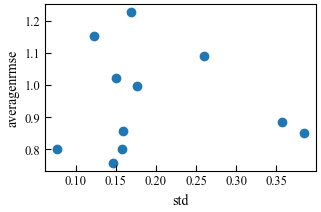

In [14]:
# 尝试画一下average_MC与averagenrmse的散点图

# 我想要将所有mean提取出来
std_values = analysis_results_df.loc['std']
averagenrmse_values = analysis_results_df.loc['averagenrmse']

# 画出mean与averagenrmse的散点图
plot_scatter(std_values, averagenrmse_values, 'std', 'averagenrmse')

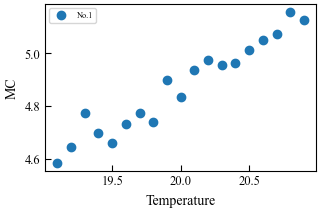

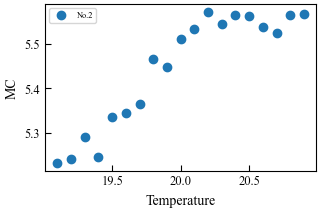

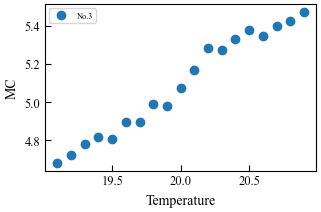

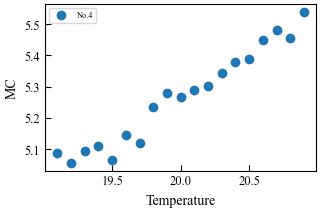

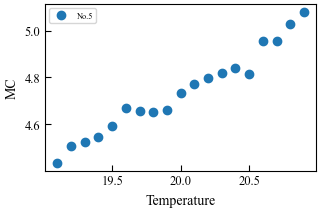

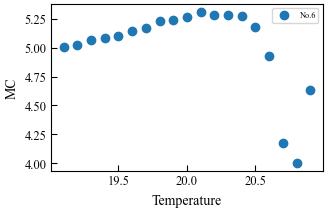

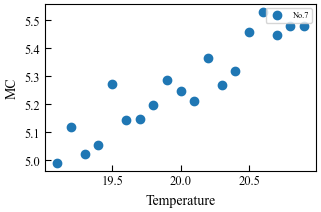

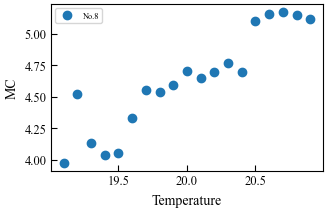

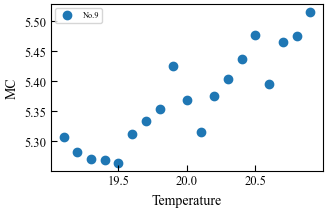

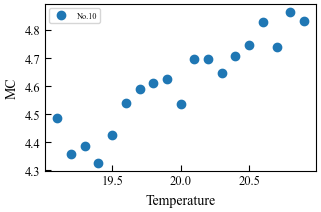

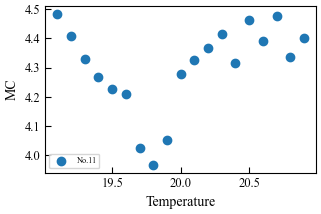

In [ ]:
# 开始画图
plot_style_config.set_pub_style()
 # 修正了括号

# 获取所有唯一的标签
labels = df_all['number'].unique()

# 循环遍历每一个标签，单独画一条线
for label in labels:

    plt.figure(figsize=plot_style_config.get_figsize('single'))
    # 筛选出当前标签的数据
    subset = df_all[df_all['number'] == label]
    
    plt.scatter(
        subset['temp'],
        subset['MC'],
        label=label,  # 这里使用标签作为图例
        marker='o',
        linewidth=1
    )

    plt.xlabel('Temperature')
    plt.ylabel('MC')
    plt.legend([f'No.{label}']) # 显示图例
    plt.show()


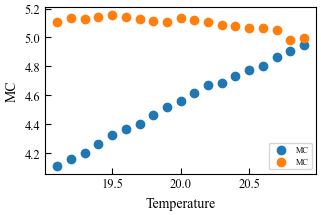

In [ ]:
# 看下uniform的数据

filename1 = '../result_MC_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
filename2 = '../result_MC_heterogeneous_n6_sr15to25_w0.16-0.2-0.2-0.15-0.1-0.18_tr19.03to21.08s0.1_bs20.0_bt20.0_temp_sweep.csv'
df_uniform = pd.read_csv(filename1)
df_heterogeneous = pd.read_csv(filename2)
plt.figure(figsize=plot_style_config.get_figsize('single'))
plt.scatter(
    df_uniform['temp'],
    df_uniform['MC'],
    label='MC',
    marker='o',
    linewidth=1
)
plt.scatter(
    df_heterogeneous['temp'],
    df_heterogeneous['MC'],
    label='MC',
    marker='o',
    linewidth=1
)
plt.xlabel('Temperature')
plt.ylabel('MC')
plt.legend()
plt.show()


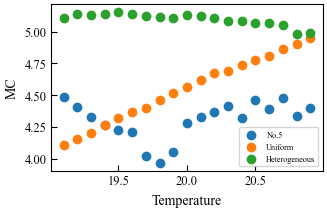

In [ ]:
# 看看TIMs_Hetero_tempsweep_Task_Pareto中的储层的MC与thermal stability中的uniform和heterogeneous的MC比较
filename = '../paretofront_points_TIMs_NARMA10/result_MC_heterogeneous_11_n5_sr20to30_w0.27-0.13-0.34-0.033-0.22_tr19.03to21.08s0.1_bs20_bt20.0_temp_sweep.csv'

df_TIMs_Hetero_n5 = pd.read_csv(filename)
plt.figure(figsize=plot_style_config.get_figsize('single'))
plt.scatter(
    df_TIMs_Hetero_n5['temp'],
    df_TIMs_Hetero_n5['MC'],
    label='No.5',
    marker='o',
    linewidth=1
)
plt.scatter(
    df_uniform['temp'],
    df_uniform['MC'],
    label='Uniform',
    marker='o',
    linewidth=1
)
plt.scatter(
    df_heterogeneous['temp'],
    df_heterogeneous['MC'],
    label='Heterogeneous',
    marker='o',
    linewidth=1
)
plt.xlabel('Temperature')
plt.ylabel('MC')
plt.legend()
plt.show()




查看KRandGR的数据

In [ ]:
# 设定参数
folder_loc = "../paretofront_points_TIMs_NARMA10" # 相对路径
pattern = "result_KRandGR_heterogeneous"
cols_needed = ['temp', 'CQ'] # 假设你需要这两列，根据实际情况修改

# 调用函数
df_all_KRandGR = load_and_merge_data(folder_loc, pattern, cols_needed)

# 检查数据
print(df_all_KRandGR.head())
print(f"包含的图例标签: {df_all_KRandGR['number'].unique()}")

找到 10 个文件，开始处理...
    temp  CQ  number
24  19.6   4       1
25  19.7   3       1
26  19.8   2       1
31  20.3  -1       1
27  19.9   0       1
包含的图例标签: [ 1  2  3  4  5  6  7  8  9 11]


<Figure size 350x216.316 with 0 Axes>

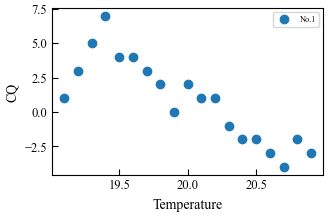

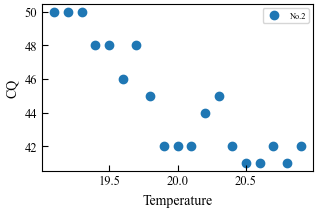

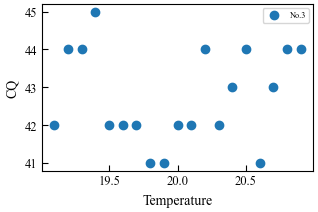

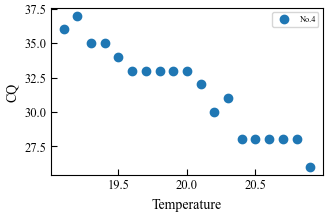

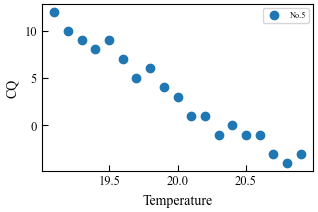

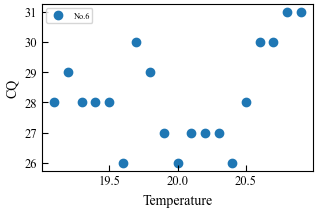

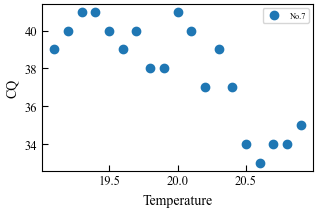

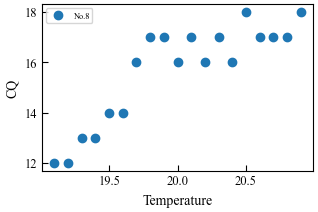

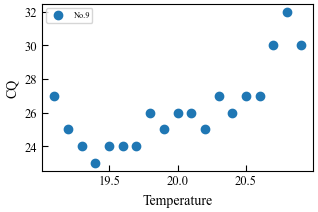

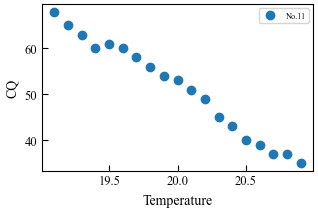

In [ ]:
# 开始画图
plot_style_config.set_pub_style()
 # 修正了括号

# 获取所有唯一的标签
labels = df_all_KRandGR['number'].unique()

# 循环遍历每一个标签，单独画一条线
for label in labels:

    plt.figure(figsize=plot_style_config.get_figsize('single'))
    # 筛选出当前标签的数据
    subset_KRandGR = df_all_KRandGR[df_all_KRandGR['number'] == label]
    
    plt.scatter(
        subset_KRandGR['temp'],
        subset_KRandGR['CQ'],
        label=label,  # 这里使用标签作为图例
        marker='o',
        linewidth=1
    )

    plt.xlabel('Temperature')
    plt.ylabel('CQ')
    plt.legend([f'No.{label}']) # 显示图例
    plt.show()

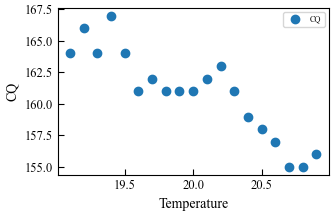

In [ ]:
# 看看uniform的CQ
filename = '../result_KRandGR_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_uniform = pd.read_csv(filename)
plt.figure(figsize=plot_style_config.get_figsize('single'))
plt.scatter(
    df_uniform['temp'],
    df_uniform['CQ'],
    label='CQ',
    marker='o',
    linewidth=1
)
plt.xlabel('Temperature')
plt.ylabel('CQ')
plt.legend()
plt.show()

各组的 MAD 结果: {np.int64(1): np.float64(3.140447311029255), np.int64(2): np.float64(1.9067075850994395), np.int64(3): np.float64(4.663985082310289), np.int64(4): np.float64(2.4543341755894947), np.int64(5): np.float64(3.131931029881115), np.int64(6): np.float64(4.803407547730557), np.int64(7): np.float64(2.531583206215892), np.int64(8): np.float64(6.598986678006237), np.int64(9): np.float64(1.2424726066356875), np.int64(10): np.float64(3.2946574767824264), np.int64(11): np.float64(2.816016722528097)}


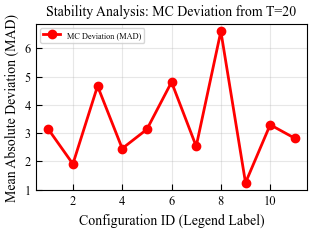

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Plotting import plot_style_config

# 1. 准备存储结果的字典
mad_results = {}

# 建议：不要硬编码 np.arange(1, 12)，而是直接从数据中获取存在的 Legend
# lists = np.arange(1, 12, 1) 
lists = sorted(df_all['Legend_Label'].unique()) 

for i in lists:
    # 提取当前组的数据
    data = df_all[df_all['Legend_Label'] == i]
    
    # === 关键修改开始 ===
    
    # 1. 找到该组在 temp=20 时的基准 MC 值
    # 注意：这里假设每个组都有 temp=20 的数据
    try:
        ref_mc = data.loc[data['temp'] == 20.0, 'MC'].values[0]
    except IndexError:
        print(f"警告: 组 {i} 缺少 temp=20 的数据，跳过。")
        continue

    # 2. 计算 MAD (平均绝对偏差)
    # 公式: mean( |MC_current - MC_ref| )
    # mad_value = np.mean(np.abs(data['MC'] - ref_mc))
    
    # 如果你想用 MAPD (百分比偏差)，请用下面这行代替上面：
    mapd_value = np.mean(np.abs((data['MC'] - ref_mc) / ref_mc)) * 100
    
    # === 关键修改结束 ===
    
    mad_results[i] = mapd_value

print("各组的 MAD 结果:", mad_results)

# 3. 画图
plot_style_config.set_pub_style()
plt.figure(figsize=plot_style_config.get_figsize())

plt.plot(
    mad_results.keys(),   # X轴: 组号 (Legend)
    mad_results.values(), # Y轴: 偏差值 (MAD)
    label='MC Deviation (MAD)',
    color='red',          # 建议改个颜色区分于原始 MC
    marker='o',
    linestyle='-',
    linewidth=2 
)

# 4. 修正标签
plt.xlabel('Configuration ID (Legend Label)') # 之前是 Temperature，不对
plt.ylabel('Mean Absolute Deviation (MAD)')   # 之前是 MC，也不准确
plt.title('Stability Analysis: MC Deviation from T=20')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


<Figure size 350x216.316 with 0 Axes>

<Figure size 350x216.316 with 0 Axes>

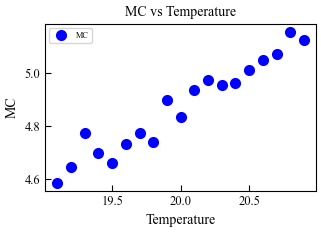

In [ ]:
plt.figure(figsize=plot_style_config.get_figsize())
plt.scatter(
    data['temp'],
    data['MC'],
    label='MC',
    color='blue',
    marker='o',
    linestyle='-',
    linewidth=2
)
plt.xlabel('Temperature')
plt.ylabel('MC')
plt.title('MC vs Temperature')
plt.legend()
plt.show()